## E-Commerce Customer Churn

### **Business Understanding**
#### **Business Model**
Perusahaan E-Commerce yang menjadi tempat jual beli barang secara online. Perusahaan ini menyediakan tempat transaksi secara online berupa website atau aplikasi. Perusahaan ini mendapatkan profit dari hasil transaksi penjual dan pembeli, sehingga tingkat jumlah transaksi berdampak terhadap keuntungan perusahaan. Untuk meningkatkan jumlah transaksi maka diperlukan pelanggan-pelanggan baru dan mempertahankan pelanggan yang sudah ada.

#### **Main Problem**
Perusahaan E-commerce membutuhkan informasi mengenai tingkat jumlah customer yang berkemungkinan untuk *churn*. Resiko kerugian yang didapatkan dari banyaknya customer yang *churn* akan berdampak sangat negatif untuk keuntungan perusahaan. Sehingga diperlukan informasi yang cocok untuk mencegah dan menangan permasalah *customer churn*.

---

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### **Data Understanding**

In [125]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [126]:
print(f'Banyak Kolom : {df.shape[1]}')
print(f'Banyak Baris : {df.shape[0]}')

Banyak Kolom : 11
Banyak Baris : 3941


In [127]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null': df.isna().mean().values * 100,
    'negative': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,Tenure,float64,4.922608,False,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,4.288252,False,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0.000000,False,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0.000000,False,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0.000000,False,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0.000000,False,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0.000000,False,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0.000000,False,2,"[0, 1]"
8,DaySinceLastOrder,float64,5.404720,False,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0.000000,False,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


In [128]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [129]:
df.describe(include='object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [130]:
df[df['Churn']==1]['Churn'].sum()

674

In [131]:
len(df['Churn'])

3941

In [132]:
numerical = df[['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder','CashbackAmount']].columns

In [133]:
from scipy.stats import normaltest

temp = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    temp.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(temp, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Tenure,317.964352,9.014014e-70,Not Normally Distributed
1,WarehouseToHome,1298.527446,1.067451e-282,Not Normally Distributed
2,NumberOfDeviceRegistered,142.935605,9.160680e-32,Not Normally Distributed
3,SatisfactionScore,1808.409232,0.000000e+00,Not Normally Distributed
4,NumberOfAddress,601.644443,2.262399e-131,Not Normally Distributed
5,Complain,1727.803236,0.000000e+00,Not Normally Distributed
6,DaySinceLastOrder,1123.768069,9.481224e-245,Not Normally Distributed
7,CashbackAmount,652.944691,1.640068e-142,Not Normally Distributed


In [134]:
from scipy.stats import shapiro

temp = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = shapiro(df[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    temp.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(temp, columns=['Feature', "Shapiro-Wilk Test", 'P-value', 'Distributed'])
dist_df

,Feature,Shapiro-Wilk Test,P-value,Distributed
0,Tenure,0.919118,6.657973e-41,Not Normally Distributed
1,WarehouseToHome,0.869019,1.156161e-48,Not Normally Distributed
2,NumberOfDeviceRegistered,0.894166,5.962349e-46,Not Normally Distributed
3,SatisfactionScore,0.884763,2.470841e-47,Not Normally Distributed
4,NumberOfAddress,0.874486,9.639375e-49,Not Normally Distributed
5,Complain,0.563795,1.018374e-71,Not Normally Distributed
6,DaySinceLastOrder,0.892175,2.723472e-45,Not Normally Distributed
7,CashbackAmount,0.885263,2.911029e-47,Not Normally Distributed


In [135]:
def Create_Boxplot(column,pos):
    plt.subplot(len(numerical), 2, pos)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}', size=12)
    plt.xlabel(column)

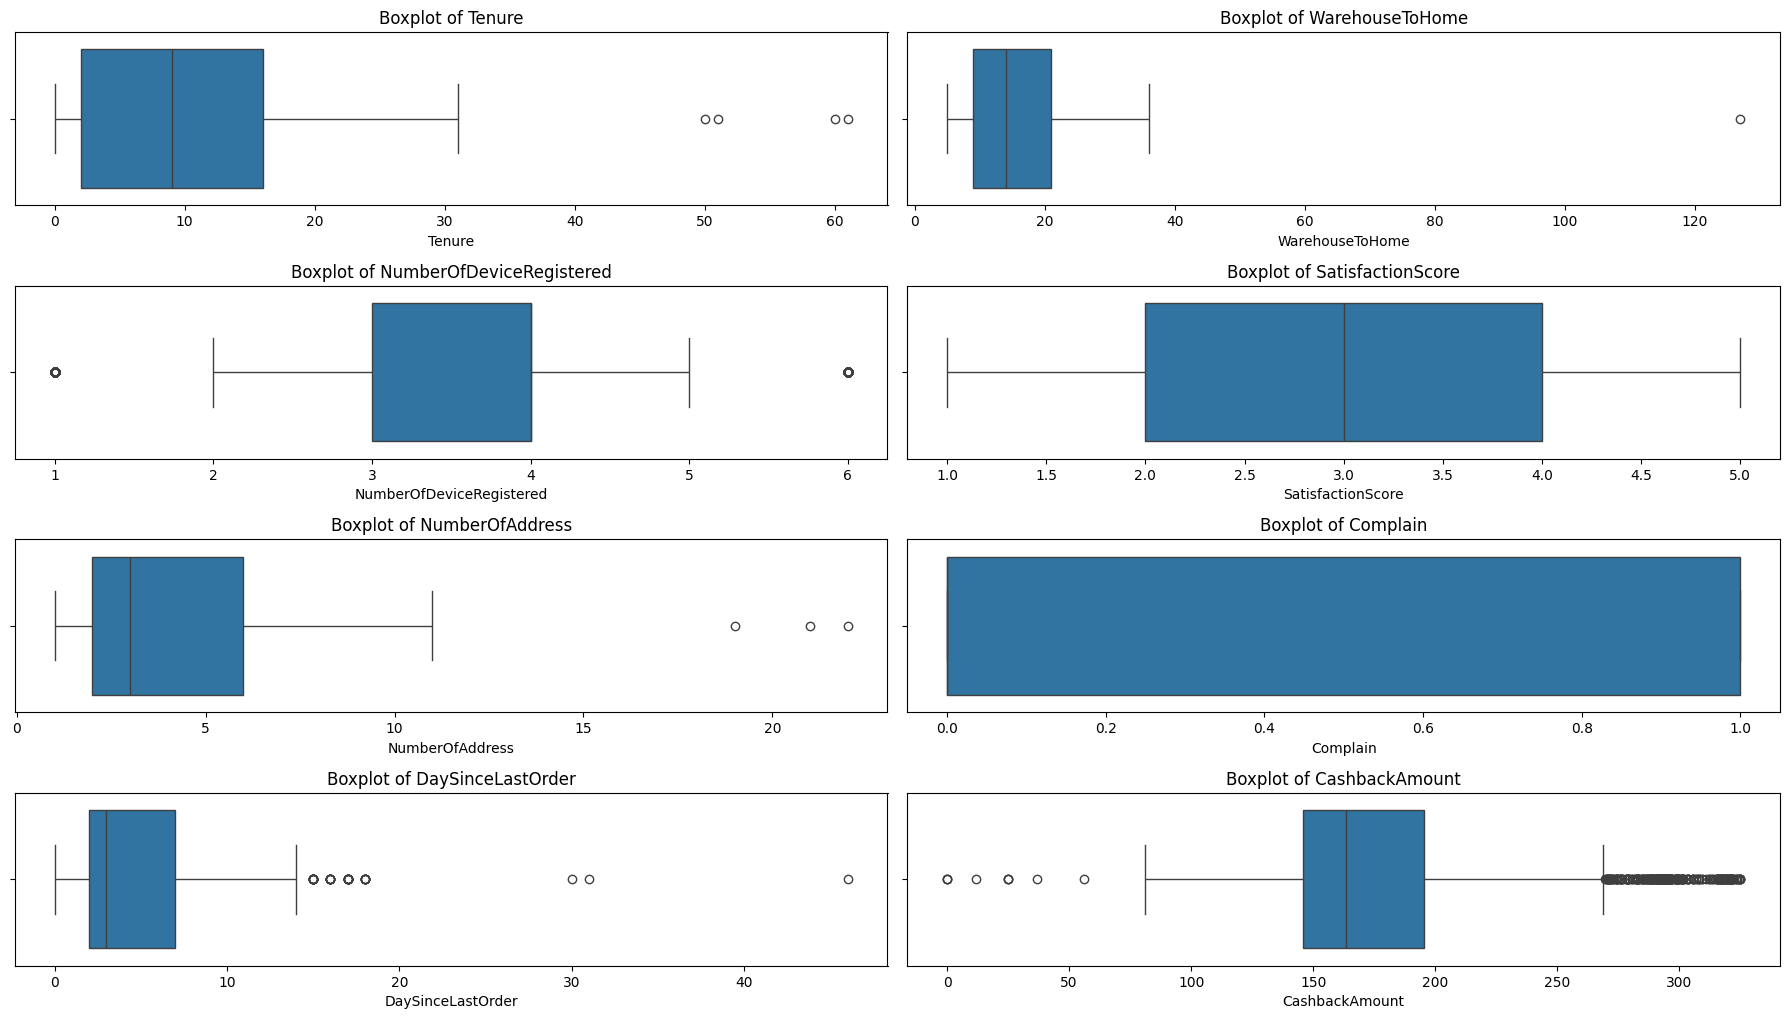

In [136]:
plt.figure(figsize=(18, 20))

for i in range (len(numerical)):
    Create_Boxplot(numerical[i],i+1)

plt.tight_layout()

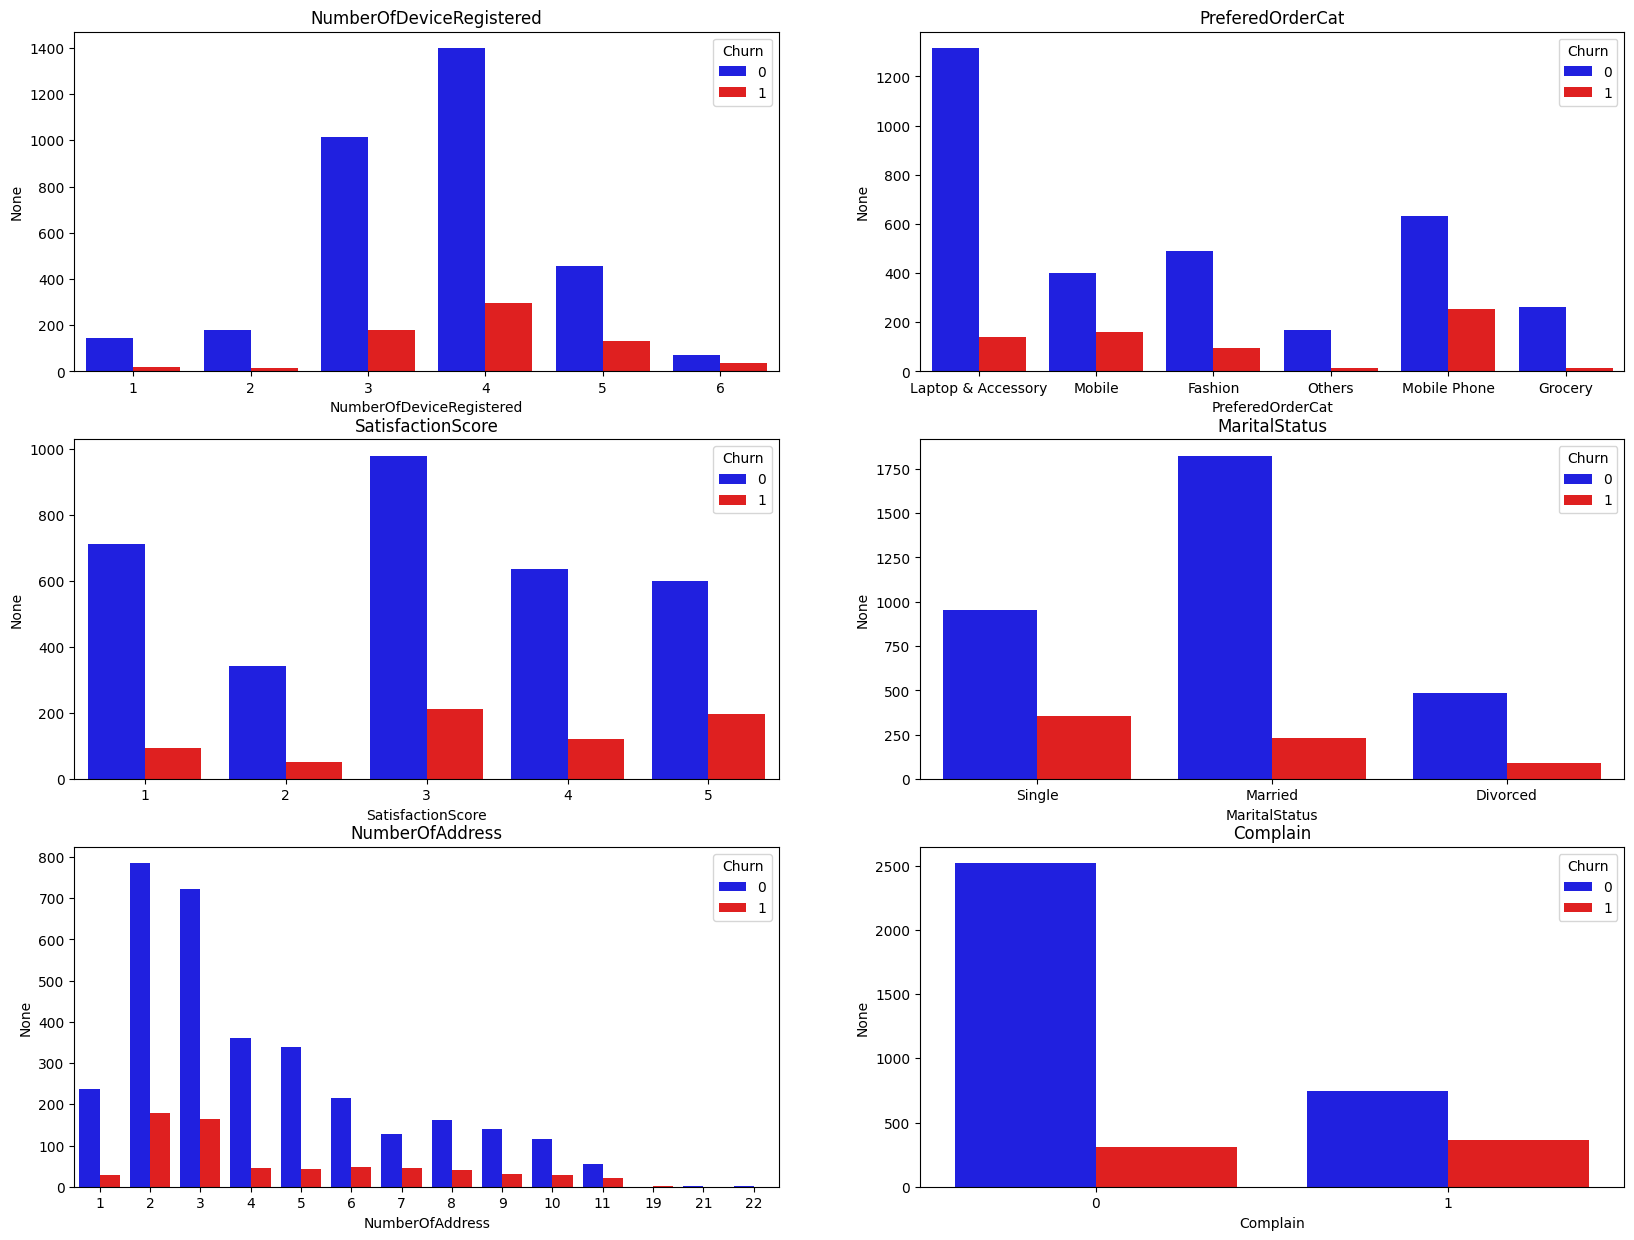

In [137]:
kategorikal = df[['NumberOfDeviceRegistered','PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus','NumberOfAddress', 'Complain','Churn']]
p = 1

plt.figure(figsize=(20,15))
for i in kategorikal.columns:
    if i != 'Churn' :
        plt.subplot(3,2,p)
        sns.barplot(kategorikal,x=i,y=df.index,estimator=len,hue='Churn',palette=['blue', 'red'])
        plt.title(i)
        p += 1

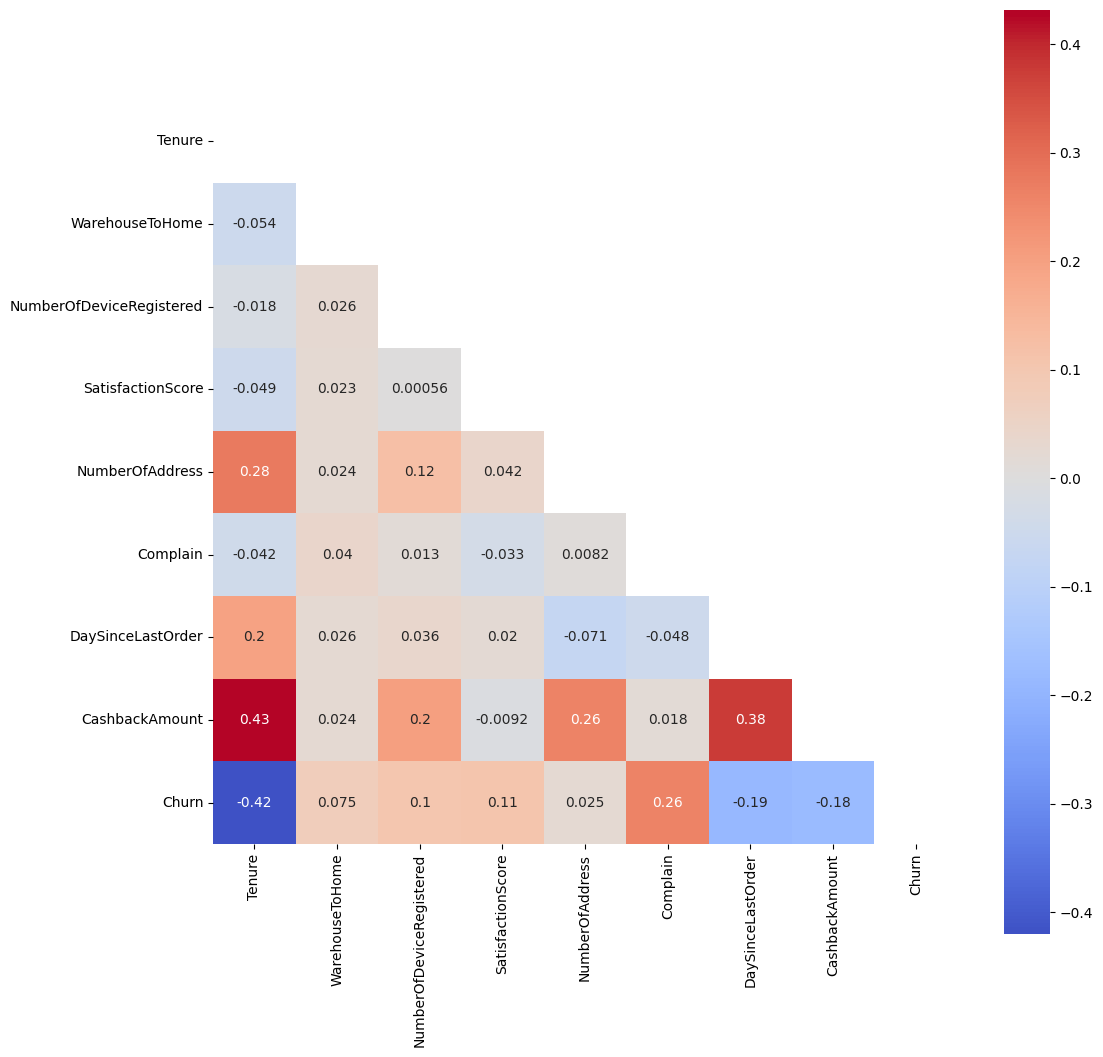

In [138]:
plt.figure(figsize=(12, 12))

matrix = np.triu(df[['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder','CashbackAmount','Churn']].corr(method='spearman'))

sns.heatmap(data=df[['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder','CashbackAmount','Churn']].corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

### **Data Preprocessing**

In [139]:
df.duplicated().sum()

671

In [140]:
df.drop_duplicates(inplace=True)

In [141]:
df.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [142]:
from collections import Counter

df['Churn'].value_counts(normalize=True)

Churn
0    0.836697
1    0.163303
Name: proportion, dtype: float64

Data dikategorikan `Moderate` imbalance

In [143]:
for i in  range (len(numerical)):
    column = numerical[i]
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Kolom {numerical[i]} : {len(outliers[column])} ({len(outliers[column])/len(df[column])*100:.2f}%) outlier')


Kolom Tenure : 4 (0.12%) outlier
Kolom WarehouseToHome : 1 (0.03%) outlier
Kolom NumberOfDeviceRegistered : 226 (6.91%) outlier
Kolom SatisfactionScore : 0 (0.00%) outlier
Kolom NumberOfAddress : 3 (0.09%) outlier
Kolom Complain : 0 (0.00%) outlier
Kolom DaySinceLastOrder : 40 (1.22%) outlier
Kolom CashbackAmount : 253 (7.74%) outlier


In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

data = df[['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder','CashbackAmount']]

vif_df = calculate_vif(data[numerical])
vif_df

,Feature,VIF
7,CashbackAmount,15.945999
2,NumberOfDeviceRegistered,9.946835
3,SatisfactionScore,5.014649
4,NumberOfAddress,3.912532
1,WarehouseToHome,3.884635
0,Tenure,3.245911
6,DaySinceLastOrder,3.008308
5,Complain,1.389260


In [145]:
df.drop(columns = 'CashbackAmount',inplace=True)
data.drop(columns = 'CashbackAmount',inplace=True)

In [146]:
vif_df = calculate_vif(data)
vif_df

,Feature,VIF
2,NumberOfDeviceRegistered,7.485263
3,SatisfactionScore,4.737590
1,WarehouseToHome,3.788158
4,NumberOfAddress,3.766193
6,DaySinceLastOrder,2.653359
0,Tenure,2.544227
5,Complain,1.375195


### **Data Splitting**

In [147]:
X = df.drop(columns='Churn')

y = df['Churn']

In [148]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

In [149]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

| Technique | Action |
| ----------------------------- | ----------- |
| One Hot Encoding | Transformasi kolom `PreferedOrderCat` dan `MartialStatus` yang memiliki jumlah uniknya kurang dari 7 |
| Robust Scaling | Transformasi skala dari tiap feature dengan menggunakan robust scaler |
| SMOTE | Resampling pada data train untuk mengurangi permasalahan imbalanced dengan membantu group kelas yang lebih kecil|

In [150]:
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['PreferedOrderCat', 'MaritalStatus']),
], remainder='passthrough')

# Scaling
scaler = RobustScaler()

# Resampling
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

resamplers = [rus, ros, smote]

# Handling missing value
imputer = IterativeImputer()

In [151]:
Pipeline([
    ('imputer', imputer),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resampler', smote),
])

Pipeline(steps=[('imputer', IterativeImputer()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('scaler', RobustScaler()),
                ('resampler', SMOTE(random_state=0))])

### **Evaluasi Model**

In [152]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [153]:
# Define the models

# Decision Tree
tree = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

Model akan dievaluasi menggunakan F2 Score, karena kita mementingkan nilai *recall* dan *precision*, namun lebih mengutamakan *recall* untuk mencegah customer churn

In [154]:
from sklearn.metrics import fbeta_score, make_scorer

# F2 Scorer using sklearn library which is make_scorer with parameter beta = 2 (to set ratio importance of recall to precision)
# fbeta_score is module to compute F-beta score
f2_score = make_scorer(fbeta_score, beta=2)

In [155]:
# Pilihan model
models = [tree, rf, adaboost, gradboost, xgboost]

f2_mean = []
f2_std = []
all_f2 = []
model_name = []


# Mencari model terbaik berdasarkan rerata f2 score terkecil dan std terkecil
for algoritma in models:

    model_pipe = Pipeline([
        ('transformer', transformer),
        ('imputer', imputer),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits = 5)

    model_cv = cross_val_score(
        model_pipe,                 
        X_train,                    
        y_train, 
        cv = skfold, 
        scoring = f2_score,
        error_score='raise'
        )

    f2_mean.append(model_cv.mean())
    f2_std.append(model_cv.std())
    all_f2.append(model_cv.round(4))
    model_name.append(algoritma.__class__.__name__)

In [156]:
pd.DataFrame({
    'model': model_name,
    'mean': f2_mean,
    'std': f2_std,
    'all_score' : all_f2
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
1,RandomForestClassifier,0.684935,0.019452,"[0.6909, 0.6856, 0.6538, 0.6802, 0.7143]"
4,XGBClassifier,0.673061,0.022204,"[0.6651, 0.7075, 0.6388, 0.6792, 0.6747]"
3,GradientBoostingClassifier,0.664857,0.027162,"[0.6381, 0.6567, 0.6659, 0.6477, 0.7159]"
2,AdaBoostClassifier,0.636865,0.011223,"[0.6237, 0.625, 0.6388, 0.6531, 0.6438]"
0,DecisionTreeClassifier,0.621216,0.022933,"[0.6437, 0.6221, 0.5869, 0.6057, 0.6477]"


In [157]:
list_f2 = []
list_resample = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    model_pipe = Pipeline([
        ('transformer', transformer),
        ('imputer', imputer),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = fbeta_score(y_test, y_pred, beta=2)
    list_f2.append(score)

In [158]:
# Perbandingan performa antar model
pd.DataFrame({
    'model': model_name,
    'f2 (test_set)': list_f2
}).sort_values('f2 (test_set)', ascending=False)

,model,f2 (test_set)
3,GradientBoostingClassifier,0.753546
1,RandomForestClassifier,0.718284
4,XGBClassifier,0.716981
2,AdaBoostClassifier,0.686767
0,DecisionTreeClassifier,0.603291


### **Insight**
Berdasarkan hasil percobaan model diatas, model yang memiliki nilai F2 score terbaik adalah model GradientBoost. Maka akan dilakukan tuning terhadap model GradientBoost untuk meningkatkan performa pembelajaran mesin.

In [159]:
# kedalaman pohon
max_depth = list(np.arange(1,12))

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,250))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.01,1,0.02))

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,30))

# Hyperparameter space Gradient Boosting
hyperparam_space_gradboost = {
    'resampler':[smote, rus, ros, None],
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}


gradboost = GradientBoostingClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
gradien_pipe = Pipeline([
        ('transformer', transformer),
        ('imputer', imputer),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', gradboost)
    ])

# Hyperparameter tuning
tuned_gradboost = RandomizedSearchCV(
    estimator=gradien_pipe, 
    param_distributions = hyperparam_space_gradboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = 4, 
    random_state=0,
    n_iter=30
)


tuned_gradboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('imputer', IterativeImputer()),
                                             ('scaler', RobustScaler()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              Gr...
                                                             0.4099999999999999,
                                                             0.42999999999999994,
                                                             0.44999999999999996,
                                                             0.4699999999999999,
                                                             0.48999999999999994,
                                                             0.5099999999999999,
                                                             0.5299999999999999,
                                                             0.5499999999999999,
                                                             0.57, 0.59, ...],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [160]:
print('GradBoost Score')
# score terbaik hasil dari randomized_search
print(f'F2 Score pada train set: {tuned_gradboost.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari tuned_gradboost
print(f'Best parameter: {tuned_gradboost.best_params_}')
print()

GradBoost Score
F2 Score pada train set: 0.779
Best parameter: {'resampler': RandomUnderSampler(random_state=0), 'model__subsample': 0.9699999999999999, 'model__n_estimators': 233, 'model__max_features': 11, 'model__max_depth': 7, 'model__learning_rate': 0.13}



In [161]:
# Model setelah hyperparameter tuning
tuned_model = tuned_gradboost.best_estimator_

# Fitting model
tuned_model.fit(X_train, y_train)

# Predict to test set
y_pred = tuned_model.predict(X_test)

# Evaluate f2 score on test set
print(f'GradBoost, model test tuning : {fbeta_score(y_test, y_pred, beta=2):.3f}')


GradBoost, model test tuning : 0.812


In [162]:
final_model = tuned_gradboost.best_estimator_

# fitting
final_model.fit(X_train, y_train)

# predict
y_pred = final_model.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.8123953098827471

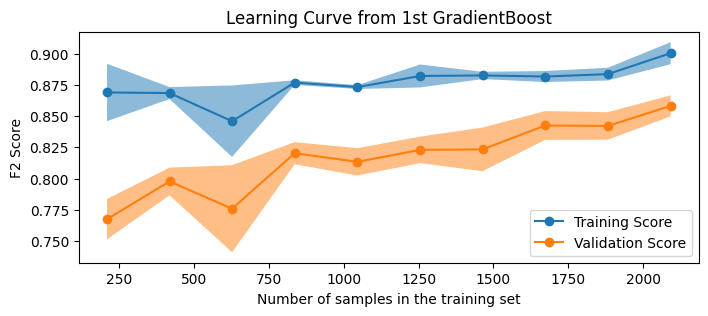

In [163]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit


# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f2_score
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='lower right')
ax.set_title(f'Learning Curve from 1st GradientBoost')
ax.set_ylabel('F2 Score')

# Show the plot
plt.show()

Tuning ke-2

In [164]:
max_depth = list(np.arange(1,9))

learning_rate = list(np.arange(0.01,1, 0.01))

n_estimators = list(np.arange(100,300))

subsample = list(np.arange(0.01,1,0.02))

max_features = list(np.arange(1,20))

hyperparam_space_gradboost_2 = {
    'resampler':[smote, rus, ros, None],
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}



gradboost = GradientBoostingClassifier(random_state=0)

skf = StratifiedKFold(n_splits = 5)

gradien_pipe = Pipeline([
        ('transformer', transformer),
        ('imputer', imputer),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', gradboost)
    ])

tuned_gradboost = RandomizedSearchCV(
    estimator=gradien_pipe, 
    param_distributions = hyperparam_space_gradboost_2, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = 4, 
    random_state=0,
    n_iter=30
)


tuned_gradboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('imputer', IterativeImputer()),
                                             ('scaler', RobustScaler()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              Gr...
                                                             0.4099999999999999,
                                                             0.42999999999999994,
                                                             0.44999999999999996,
                                                             0.4699999999999999,
                                                             0.48999999999999994,
                                                             0.5099999999999999,
                                                             0.5299999999999999,
                                                             0.5499999999999999,
                                                             0.57, 0.59, ...],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [165]:
print('GradBoost Score')
print(f'F2 Score pada train set: {tuned_gradboost.best_score_:.3f}')

print(f'Best parameter: {tuned_gradboost.best_params_}')
print()

GradBoost Score
F2 Score pada train set: 0.749
Best parameter: {'resampler': RandomUnderSampler(random_state=0), 'model__subsample': 0.5499999999999999, 'model__n_estimators': 250, 'model__max_features': 14, 'model__max_depth': 4, 'model__learning_rate': 0.15000000000000002}



In [166]:
tuned_model = tuned_gradboost.best_estimator_

tuned_model.fit(X_train, y_train)

y_pred = tuned_model.predict(X_test)

print(f'GradBoost, model test tuning : {fbeta_score(y_test, y_pred, beta=2):.3f}')


GradBoost, model test tuning : 0.801


In [167]:
final_model = tuned_gradboost.best_estimator_

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

fbeta_score(y_test, y_pred, beta=2)

0.8009708737864077

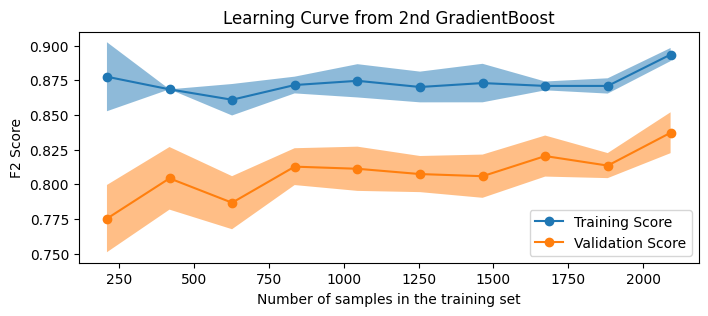

In [168]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 3))

common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f2_score
}

LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='lower right')
ax.set_title(f'Learning Curve from 2nd GradientBoost')
ax.set_ylabel('F2 Score')

plt.show()

### **Insight**

| F2 Score | Train Set | Test Set |
| --- | --- | --- |
| GradBoost Before Tuning | 0.664 | 0.753 |
| GradBoost After 1st Tuning | 0.779 | 0.812 |
| GradBoost After 2nd Tuning | 0.749 | 0.801 |

- Model GradientBoost yang terbaik adalah model yang pertama ditunning.
- Berdasarkan performa f2 score maka Hyperparameter tuning meningkatkan performa untuk model GradientBoost.
- Berdasarkan Learning Curve, model GradientBoost pertama memiliki tingkat overtuning yang lebih kecil sehingga pemodelan lebih stabil dibandingkan tuning ke-2
- Hyperparameter terbaik berdasarkan RandomizedSearch adalah **{'resampler': RandomUnderSampler(random_state=0), 'model__subsample': 0.5, 'model__reg_alpha': 10.0, 'model__n_estimators': 157, 'model__max_depth': 6, 'model__learning_rate': 0.62, 'model__gamma': 4, 'model__colsample_bytree': 0.3}**

### **GradientBoost Classifier**

GradientBoost adalah sala satu algoritma pembelajaran mesin untuk menangani pemodelan klasifikasi dan juga regresi. Algoritma ini memanfaatkan pembelajaran dari model sebelumnya untuk meningkatkan prediksi dan performa akhir dari pemodelan. GradientBoost memiliki parameter untuk yang dapat dikonfirgurasi agar dapat meningkatkan performa dari model. Parameter-parameter tersebut antara lain `learning_rate` yakni tingkat pembelajaran dari model dimana semakin kecil nilai pembelajarannya maka semakin luas pemodelan yang akan dibuat. n_estimator parameter jumlah pohon yang akan dimodelkan oleh algoritma. subsample merupakan sample dari pohon yang diambil secara random yang bermanfaat untuk menstabilkan model.


## **Feature Engineering**
Pada tahapan ini akan dicoba dilakukan feature engineering untuk melihat apakah fitur-fitur yang dikonfigurasi dapat meningkatkan performa model yang telah dicoba.

In [169]:
# Mengubah Laptop & Accesory, Mobile dan Mobile Phone menjadi kategori Electronic
df_feat = df.copy()

df_feat.loc[df_feat['PreferedOrderCat'] == 'Laptop & Accessory', 'PreferedOrderCat'] = 'Electronic'
df_feat.loc[df_feat['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat'] = 'Electronic'
df_feat.loc[df_feat['PreferedOrderCat'] == 'Mobile Phone', 'PreferedOrderCat'] = 'Electronic'

In [170]:
# Merubah nilai SatisfactionScore dimana jika nilai lebih besar sama dengan 3 maka dikatakan Satisfied dan jika kurang dari 3 maka dikatakan Not Satisfied
df_feat.loc[df_feat['SatisfactionScore'] >= 3, 'SatisfactionScore'] = 'Satisfied'

In [171]:
df_feat.loc[df_feat['SatisfactionScore'] == 1 , 'SatisfactionScore'] = 'Not Satisfied'
df_feat.loc[df_feat['SatisfactionScore'] == 2 , 'SatisfactionScore'] = 'Not Satisfied'

In [172]:
df_feat.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,Churn
0,15.0,29.0,4,Electronic,Satisfied,Single,2,0,7.0,0
1,7.0,25.0,4,Electronic,Not Satisfied,Married,2,0,7.0,0
2,27.0,13.0,3,Electronic,Not Satisfied,Married,5,0,7.0,0
3,20.0,25.0,4,Fashion,Satisfied,Divorced,7,0,NaN,0
4,30.0,15.0,4,Others,Satisfied,Single,8,0,8.0,0


In [178]:
X_feat = df_feat.drop(columns='Churn')

y_feat = df_feat['Churn']

X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(
    X_feat, y_feat, test_size=0.2, random_state=0, stratify=y
)

In [179]:
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['PreferedOrderCat', 'MaritalStatus', 'SatisfactionScore']),
], remainder='passthrough')

# Scaling
scaler = RobustScaler()

# Resampling
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

resamplers = [rus, ros, smote]

# Handling missing value
imputer = IterativeImputer()

In [180]:
# kedalaman pohon
max_depth = list(np.arange(1,12))

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,250))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.01,1,0.02))

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,30))

# Hyperparameter space Gradient Boosting
hyperparam_space_gradboost = {
    'resampler':[smote, rus, ros, None],
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}


gradboost = GradientBoostingClassifier(random_state=0)

skf = StratifiedKFold(n_splits = 5)

gradien_pipe = Pipeline([
        ('transformer', transformer),
        ('imputer', imputer),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', gradboost)
    ])

tuned_gradboost_feat = RandomizedSearchCV(
    estimator=gradien_pipe, 
    param_distributions = hyperparam_space_gradboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = 4, 
    random_state=0,
    n_iter=30
)


tuned_gradboost_feat.fit(X_train_feat, y_train_feat)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus',
                                                                                'SatisfactionScore'])])),
                                             ('imputer', IterativeImputer()),
                                             ('scaler', RobustScaler()),
                                             ('resampler',
                                              SMOTE(random_s...
                                                             0.4099999999999999,
                                                             0.42999999999999994,
                                                             0.44999999999999996,
                                                             0.4699999999999999,
                                                             0.48999999999999994,
                                                             0.5099999999999999,
                                                             0.5299999999999999,
                                                             0.5499999999999999,
                                                             0.57, 0.59, ...],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [181]:
print('GradBoost Score')
# score terbaik hasil dari randomized_search
print(f'F2 Score pada train set: {tuned_gradboost_feat.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari tuned_gradboost
print(f'Best parameter: {tuned_gradboost_feat.best_params_}')
print()

GradBoost Score
F2 Score pada train set: 0.743
Best parameter: {'resampler': RandomUnderSampler(random_state=0), 'model__subsample': 0.9699999999999999, 'model__n_estimators': 233, 'model__max_features': 11, 'model__max_depth': 7, 'model__learning_rate': 0.13}



In [182]:
# Model setelah hyperparameter tuning
tuned_model_feat = tuned_gradboost_feat.best_estimator_

# Fitting model
tuned_model_feat.fit(X_train_feat, y_train_feat)

# Predict to test set
y_pred_feat = tuned_model_feat.predict(X_test_feat)

# Evaluate f2 score on test set
print(f'GradBoost, model test tuning : {fbeta_score(y_test_feat, y_pred_feat, beta=2):.3f}')


GradBoost, model test tuning : 0.800


In [206]:
feat_final_model = tuned_gradboost_feat.best_estimator_

# fitting
feat_final_model.fit(X_train_feat, y_train_feat)

# predict
y_pred_feat = feat_final_model.predict(X_test_feat)

# evaluate (f2-score)
fbeta_score(y_test_feat, y_pred_feat, beta=2)

0.8003300330033003

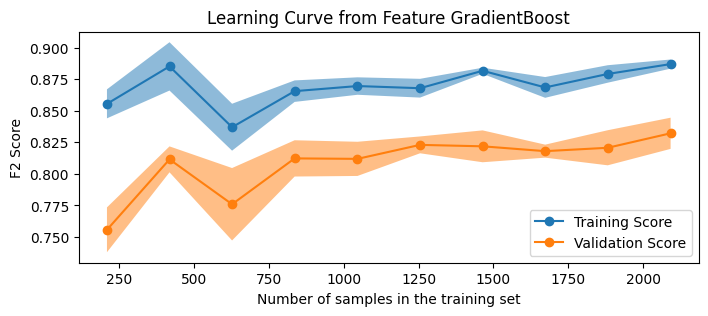

In [208]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit


# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train_feat,
    "y": y_train_feat,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f2_score
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(feat_final_model, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='lower right')
ax.set_title(f'Learning Curve from Feature GradientBoost')
ax.set_ylabel('F2 Score')

# Show the plot
plt.show()

### **Insight**

| F2 Score | Train Set | Test Set |
| --- | --- | --- |
| GradBoost Before Tuning | 0.664 | 0.753 |
| GradBoost After 1st Tuning | 0.779 | 0.812 |
| GradBoost After 2nd Tuning | 0.749 | 0.801 |
| GradBoost After Feature Engineering | 0.743 | 0.800 |

- Berdasarkan hasil pemodelan, model mengalami penurunan score setelah menggunakan Feature Engineering
- Nilai score tuning pertama tetap memiliki nilai terbaik dan lebih tinggi dibanding model dengan tuning yang sama namun ditambahkan feature engineering

### **Feature Importance**

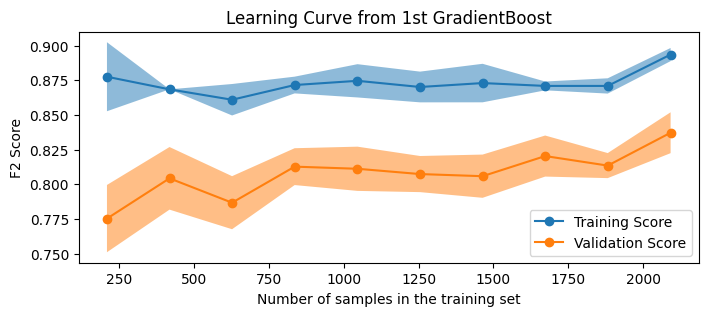

In [185]:
fig, ax = plt.subplots(figsize=(8, 3))

common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f2_score
}

LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='lower right')
ax.set_title(f'Learning Curve from 1st GradientBoost')
ax.set_ylabel('F2 Score')

plt.show()

In [186]:
onehot_features = list(final_model[0].transformers_[0][1].get_feature_names_out())
remainder_features = list(X.columns[final_model[0].transformers_[1][2]])

feature_names = onehot_features + remainder_features

In [187]:
df_coef = pd.DataFrame({
    "feature" : feature_names, 
    "importances" : final_model['model'].feature_importances_
}).sort_values(by='importances', ascending=False)

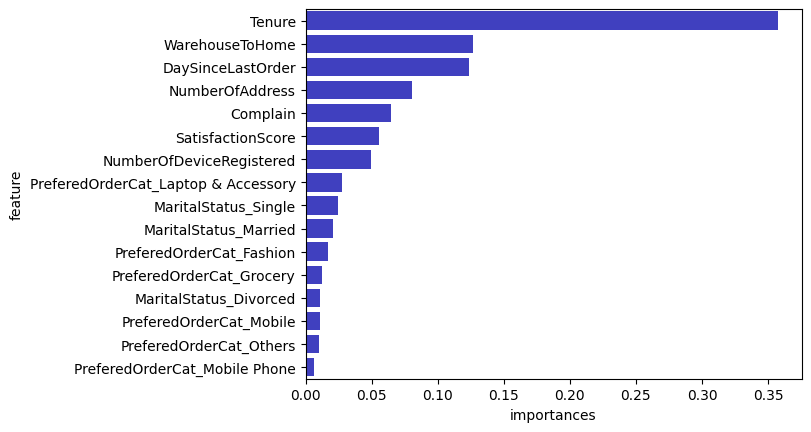

In [188]:
sns.barplot(data=df_coef, x='importances', y='feature', color='blue', saturation=0.5)
plt.show()

### **Shapley Value of Explanations**

In [189]:
# Model
final_model[-1]

GradientBoostingClassifier(learning_rate=0.15000000000000002, max_depth=4,
                           max_features=14, n_estimators=250, random_state=0,
                           subsample=0.5499999999999999)

In [190]:
# membuat feature yang telah di preprocessing
X_train_processed = final_model[0:-2].fit_transform(X_train)
X_train_resampled, y_train_resampled = final_model[-2].fit_resample(X_train_processed, y_train)

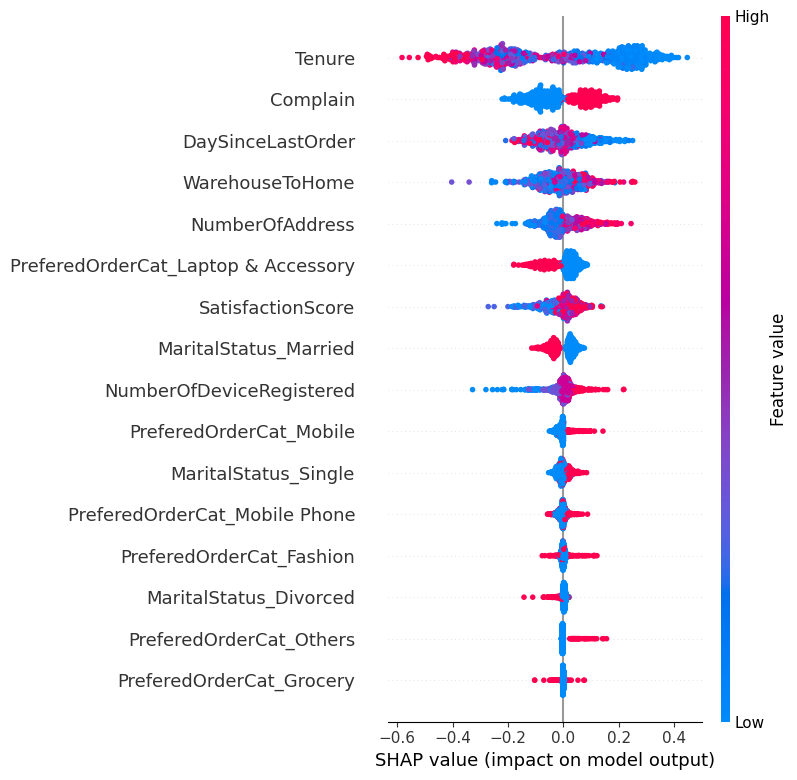

In [191]:
import shap

shap_values = shap.TreeExplainer(final_model[-1],
                                 data = X_train_resampled,
                                 feature_perturbation = "interventional",
                                 model_output="probability").shap_values(X_train_resampled)
                                 
shap.summary_plot(shap_values, X_train_resampled,feature_names = feature_names)

In [192]:
shap.initjs()

def shap_plot(j,model,S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

# membuat dataframe X_test yang telah di preprocessing
X_test_processed = final_model[0:-2].fit_transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

In [193]:
print(f"Prediksi customer : {('Churn' if y_test.iloc[0] == 1 else 'Tidak Churn')} from y_test")

shap_plot(0,final_model[-1],X_test_processed_df)

Prediksi customer : Tidak Churn from y_test


In [194]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=feature_names,
    class_names=['Not Churn', 'Churn'],
    mode='classification'
)

Prediksi customer : Tidak Churn from y_test


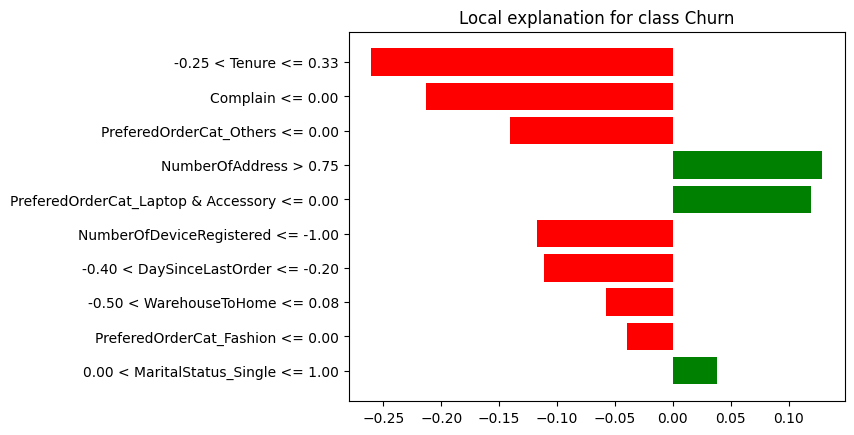

In [195]:
print(f"Prediksi customer : {('Churn' if y_test.iloc[0] == 1 else 'Tidak Churn')} from y_test")

exp = explainer.explain_instance(X_test_processed_df.iloc[0], 
                                 final_model[-1].predict_proba, 
                                 num_features=10)
exp.as_pyplot_figure()
plt.show()

In [196]:
print(f"Prediksi customer : {('Churn' if y_test.iloc[0] == 1 else 'Tidak Churn')} from y_test")

exp = explainer.explain_instance(
    data_row=X_test_processed_df.iloc[0], 
    predict_fn=final_model[-1].predict_proba
)

exp.show_in_notebook(show_table=True)

Prediksi customer : Tidak Churn from y_test


##

### **Insight**
Berdasarkan feature importance Tenure dan Complain merupakan fitur yang mempengaruhi seorang customer akan churn atau tidak. Hasil Shaply dapat dilihat bahwa customer pada index pertama tidak churn, dimana faktor terbesar yakni customer tersebut memiliki nilai Tenure dan Complain yang rendah sehingga mengurangi peluang customer tersebut untuk churn.

In [197]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       547
           1       0.54      0.91      0.68       107

    accuracy                           0.86       654
   macro avg       0.76      0.88      0.80       654
weighted avg       0.91      0.86      0.87       654



<Axes: >

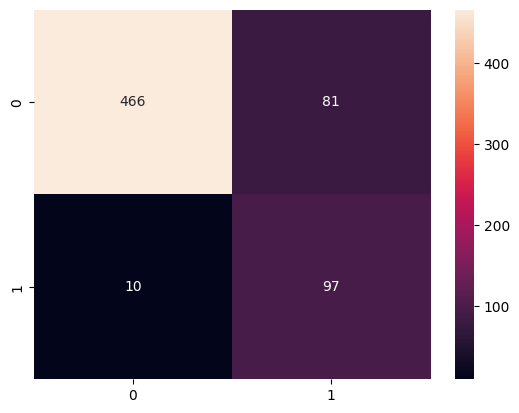

In [198]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

Berdasarkan confusion matrix diatas kita dapat mengetahui bahwa :
- Jumlah calon customer yang aktualnya churn dan diprediksi akan churn (True Positive) : 97 orang
- Jumlah calon customer yang aktualnya churn tetapi diprediksi tidak akan churn (False Negative) : 10 orang
- Jumlah calon customer yang aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 466 orang
- Jumlah calon customer yang aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 97 orang

---
Berdasarkan artikel di media online (Hughes, 2022) dimana secara rata-rata revenue yang didapatkan per-customer adalah 103$. Dampak yang dapat terjadi dari asumsi tersebut dengan data awal yakni :
- Total customer churn dari data : 534
- Pendapatan yang hilang karena customer churn : 534 x 103 = `55002$`

---
**Machine Learning**

Dengan menggunakan machine lerning, perusahaan dapat memprediksi customer yang akan churn. Sehingga dampak kerugian yang diberikan dari memanfaatkan machine learning yakni :
- Customer yang aktualnya churn namun diprediksi tidak churn : 10 x 103 = `1030$`
- Customer yang aktualnya tidak churn namun diprediksi churn : 97 x 103 = `9991$`
- Rugi yang didapatkan menggunakan machine elarning : 824$ + 9373$ = `11021$`

---
Penurunan potensi kerugian dengan menggunakan machine learning yakni : 55002 - 11021 = 43981$

dimana penurunan tersebut sebesar : (44815 / 55002) * 100% = 79.96%

Berdasarkan hasil machine learning yang telah di tuning maka, model yang didapatkan dapat mengurangi kerugian sebesar 79.96%

## **Save Final Model**

In [204]:
import pickle

# Define final model
final_model = tuned_gradboost.best_estimator_

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('gradboost_for_churn.sav', 'wb'))

In [205]:
model_loaded_pickle = pickle.load(open('gradboost_for_churn.sav', 'rb'))

Predict to Existing Data

In [201]:
X_test.iloc[[0]]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder
3251,NaN,14.0,1,Mobile,4,Single,10,0,2.0


In [202]:
#Actual tidak Churn
y_test.iloc[0]

0

In [203]:
model_loaded_pickle.predict(X_test.iloc[[0]])

# Hasil Prediksi sama dengan aktual (tidak Churn) pada user yang sama

array([0], dtype=int64)

Dari hasil test diatas, maka model yang tersimpan sudah benar sesuai dengan data aktualnya

---

## **Kesimpulan dan Rekomendasi**
### **Kesimpulan**
Berdasarkan hasil percobaan dan analisis dapat ditarik beberapa kesimpulan sebagai berikut ini :

`Tingkat F2 Score`
1. Terjadi peningkatkan F2 Score pada model GradientBoost sebesar 4.6% dari nilai awal yakni 75.3% menjadi 79.9%.
2. Setelah diuji menggunakan beberapa konfiguris tuning dan feature engineering, konfigurasi tuning pertama merupakan model yang mamiliki F2 score tertinggi.

`Machine Learning for Business`

Berdasarkan hasil analisis dapat ditarik kesimpulan penggunaan machine learning untuk bisnis sebagai berikut :
1. Dengan memanfaatkan machine learning maka perusahaan dapat mengurangi dampak kerugian 79% dimana kerugian awal tampa machine learning yakni 55002$ dan setelah menggunakan machine learning menjadi 11021$ dengan selisih sebesar 43981$
2. Berdasarkan hasil yang didapat, bisa dikatakan bahwa penggunaan machine learning dapat mengurangi dampak terhadap kerugian resiko customer yang churn secara signifikan.

`Feature Importance`

Berdasarkan hasil analisis feature importance dapat dikatakan bahwa :
1. Fitur yang paling penting adalah Tenure, yakni jangka waktu seorang customer menggunakan layanan e-commerce perusahaan dan Complain, yakni jumlah complain yang diajukan oleh customer
2. Berdasarkan fitur tersebut perusahaan mampu mengambil keputusan yang tepat terhadap hal-hal yang berpengaruh besar terhadap terjadinya customer churn.

### **Rekomendasi**
`Bisnis`
1. Tenure merupakan faktor yang paling berdampak pada kasus customer churn, sehingga perusahaan dapat memberikan promo ataupun reward terhadap customer untuk memperpanjang penggunaan layanan e-commerce milik perusahaan.
2. Complain merupakan faktor kedua tertinggi pada dampak kasus customer churn, sehingga perusahaan sebaiknya melakukan survey ataupun mereview pelayanan e-commerce yang lebih baik sehingga dapat memenuhi kebutuhan dan keinginan customer.
3. Perusahaan sebaiknya memanfaat machine learning untuk memprediksi lalu mencegah terjadinya customer churn.

`Pemodelan Machine Learning`
1. Mengembangkan pemodelan menggunakan model klasifikasi yang lebih baru dan memiliki tingkat performa yang lebih tinggi.
2. Menambahkan fitur-fitur baru pada data untuk mendapatkan informasi-informasi yang lebih detail pada kemungkinan customer churn.